# Assignment 1: K-Nearest Neighbor (10 marks)

Student Name: Alejandra Victoria Abril Pareja

Student ID: 1199503

## General info

<b>Due date</b>: Friday, 12 August 2022 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:hasti.samadi@unimelb.edu.au">Hasti Samadi</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 10, and make up 10% of your overall mark for this subject.

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/126693/pages/python-and-jupyter-notebooks?module_item_id=3950453) on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer.If your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (Piazza -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: While you may discuss this homework in general terms with other students, it ultimately is still an individual task. Reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/126693/modules#module_734188">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>

## Overview

In this homework, you'll be applying the K-nearest neighbor (KNN) classification algorithm to a real-world machine learning data set. In particular, we will predict the affordability of a car given a diverse set of features, including the make, engine type, style,  and horsepower and other descriptive properties of the car.

Firstly, you will read in the dataset into a train and a test set, and you will create two feature sets (Q1). Secondly, you will implement different distance functions (Q2). Thirdly, you will implement one KNN classifier (Q3, Q4) and apply it to the data set using different distance functions and parameter K (Q5). Finally, you will assess the quality of your classifier by comparing its class predictions to the gold standard labels (Q6).




# Question 1: Loading the data (0.5 marks)

**Instructions:** For this assignment we will develop a K-Nearest Neighbors (KNN) classifier to predict the 
affordability of cars. The list of classes is:

```
cheap
affordable
expensive
very expensive
```

We use a modified version of the Car data set from the UCI Machine learning repository.

The original data can be found here: https://archive.ics.uci.edu/ml/datasets/Automobile

The dataset consists of 204 instances. Each instance corresponds to a car which has a unique identifier (X; first field) and is characterized with 24 features as described in the file *car.names* which is provided as part of this assignment.

You need to first obtain this dataset, which is on Canvas (assignment 1). The files *car.features* and *car.labels* contain the data we will use in this notebook. Make sure the files are saved in the same folder as this notebook. 

Both files are in comma-separated value format. The first line in each file is a header, naming each feature (or label).

*car.features* contains 204 instances, one line per instance. The first field is the unique instance identifier. The following fields contain the 24 features, as described in the file *car.names*.

*car.labels* contains the gold labels (i.e., one of the four classes above), one instance per line. Again, the first field is the instance identifier, and the second field the instance label.

*car.names* contains additional explanations about the data set and the features.

All feature values are floats, and for Questions 1 through 5, we make the simplifying assumption that all values are indeed real-valued. You may want to revisit this assumption in Question 6.



**Task**: Read the two files  
1. create a **training_feature** set (list of features for the first 163 instances in the car.* files) and a **training_label** set (list of labels for the corresponding). 
2. create a **test_feature** set (list of features of the remaining instances in the car.* files) and a **test_label** set (list of labels for the corresponding). 
---------
- Do **not** shuffle the data.
- Do **not** modify feature or label representations. 
- Features must be represented as floats.
--------
You may use any Python packages you want, but not change the specified data types (i.e., they should be of type List, and *not* dataframe, dictionary etc).

In [1]:
data = open("car.features", 'r').readlines()
labels = open("car.labels", 'r').readlines()

train_features = []
train_labels   = []
test_features = []
test_labels   = []

###########################
## YOUR CODE BEGINS HERE
###########################

# separating headers from  instances
instances_features = data[1:]
instances_labels = labels[1:]

# creating training and test lists from features
features = []
for instance in instances_features:
    instance = instance.strip()
    instance = instance.split(",")
    inst_features = instance[1:25] 
    inst_features = [float(i) for i in inst_features]
    features.append(inst_features)
train_features = features[0:163]
test_features = features[163:]

# creating training and test lists from labels
labels = []
for instance in instances_labels:
    instance = instance.strip()
    instance = instance.split(",")
    inst_labels = instance[1]
    labels.append(inst_labels)
train_labels = labels[0:163]
test_labels = labels[163:]

###########################
## YOUR CODE ENDS HERE
###########################

print("number of train/test instances:",len(train_features), len(test_features))
print("number of train/test features:",len(train_features[40]), len(test_features[1]))


number of train/test instances: 163 41
number of train/test features: 24 24


### Question 2: Distance Functions [1.5 marks]

<b>Instructions</b>: Implement the three distance functions specified below. 

1. Euclidean distance
2. Cosine distance
3. Chebyshev distance, defined as:
    
    $d(x,y)=\max_{i}|x_i-y_i|$
    

Each distance function takes as input
- Two feature vectors (each of type List)

and returns as output
- The distance between the two feature vectors (float)

------------

Use <b>only</b> the library imported below, i.e., <b>do not</b> use implementations from any other Python library. 

In [2]:
import math as m

def euclidean_distance(fw1, fw2):
    distance = 0
    for i in range(len(fw1)):
        dist = (fw1[i] - fw2[i])**2
        distance = distance + dist
    distance = m.sqrt(distance)
    return distance

def cosine_distance(fw1, fw2):
    numerator = 0
    denominator1 = 0
    denominator2 = 0
    for i in range(len(fw1)):
        numerator = numerator + (fw1[i] * fw2[i])
        denominator1 += fw1[i]**2
        denominator2 += fw2[i]**2
    denominator1 = m.sqrt(denominator1)
    denominator2 = m.sqrt(denominator2)
    distance = 1 - (numerator/(denominator1 * denominator2))
    return distance

def chebyshev_distance(fw1, fw2):
    temp_list = []
    for i in range(len(fw1)):
        temp_list.append(abs((fw1[i]-fw2[i])))
    distance = max(temp_list)
    distance
    return distance

###########################
## YOUR CODE ENDS HERE
###########################

print(round(euclidean_distance(train_features[100],test_features[2]), 5))
print(round(chebyshev_distance(train_features[100],test_features[2]), 5))
print(round(cosine_distance(train_features[100],test_features[2]), 5))


600.17572
600.0
2e-05


### Question 3: KNN Classifier [2.0 marks]

<b>Instructions</b>: Here, you implement your KNN classifier. It takes as input 
- training data features
- training data labels
- test data features
- parameter K
- distance function(s) based on which nearest neighbors will be identified

It returns as output 
- the predicted labels for the test data

**Ties among distances**. If there are more than K instances with the same (smallest) distance value, consider the first K. For example, for K=1 if you have 3 instances (with identifiers i = 3, 12, 54) that all have the same distance to your test instance (e.g., 0.641), the instance with the smallest identifier should be selected as the nearest neighbor (in this case i = 3).

**Ties at prediction time.** Ties can also occur at class prediction time when two (or more) classes are supported by the same number of neighbors. In that case choose the class of the 1 nearest neighbor. The "1 nearest neighbor" refers only to those classes represented with the maximum support in the neighborhood. E.g., for K = 5, with a neighborhood ordered by distance: {'cheap', 'expensive', 'affordable', expensive', 'affordable'} you would choose the 1 nearest neighbor among {'expensive','affordable'}.

-----------

**You should implement the classifier from scratch yourself**, i.e., <b> you must not</b> use an existing implementation in any Python library. You may use Python packages (e.g., math, numpy, collections, ...) to help with your implementation.

In [3]:
def KNN(train_features, train_labels, test_features, k, dist_fun, weighted=False):
    
    predictions = []
    
    ###########################
    ## Your answer BEGINS HERE
    ###########################
    
    import collections as c

    for i in range(len(test_features)): #
        
        dic_dist_inst = [] # listing the calculated distances as dictionaries with their corresponding labels for each test instance

        for j in range(len(train_features)):
            dist = dist_fun(test_features[i], train_features[j])
            dic_dist_inst.append({"label":train_labels[j],"dist":dist})
        sorted_values = sorted(dic_dist_inst, key=lambda d: d['dist']) 
        k_nearest = sorted_values[0:k]  # k_nearest = list of the KNN as dictionaries with label names and corresponding values in ascending order (breaking ties among distances)

        ##### Majority Voting (Default) version starts, weighted = False ######
        
        if weighted == False: 
           
            kn_neighbors = [] # listing only the KNN labels in order according to their distances 
            for n in range(len(k_nearest)):
                kn_neighbors.append(k_nearest[n]["label"]) 
            counting = {m:kn_neighbors.count(m) for m in kn_neighbors} # counts the repeated labels showing the totals of each label in order as they come out (breaking ties at prediction time)
            prediction = max(counting, key = counting.get) # gets the first maximum value, so the label with lowest index number (breaking ties at prediction time)
            predictions.append(prediction)

        ##### Weighted version starts, weighted = True #####
            
        else: 

            kn_neighbors_weight = [] # listing the KNN as dictionaries with labels and correspoing weighted values
            totals = {} # sum up of weighted values for each label
            for n in range(len(k_nearest)):
                k_nearest[n]['dist'] = 1/(k_nearest[n]['dist'] + 0.000001) # changing dist value to weighted value          
                kn_neighbors_weight.append({k_nearest[n]["label"]:k_nearest[n]["dist"]})                                   
                totals = c.Counter(totals) + c.Counter(kn_neighbors_weight[n])
            prediction = max(totals, key = totals.get)
            predictions.append(prediction) 
        
    ###########################
    ## Your answer ENDS HERE
    ###########################
        
    return predictions


### Question 4: Weighted KNN Classifier [1.0 mark]

<b>Instructions</b>: Extend your implementation of the KNN classifier in Question 3 to a Weighted KNN classifier. You should change the code in the cell above. Use Inverse Distance as weights:

$w_j=\frac{1}{d_j+\epsilon}$

where

- $d_j$ is the distance of of the jth nearest neighbor to the test instance
- $\epsilon=0.000001$

Use the Boolean parameter `weighted` to specify the KNN version when calling the function.

### Question 5: Applying your KNN classifiers to the Car Dataset [0.5 marks]

**Using the functions you have implemented above, please**

<b> 1. </b>
For each of the distance functions you implemented in Question 2, construct (a) Nine majority voting KNN classifiers and (b) Nine weighted KNN classifiers, respectively, with 

- K=1
- K=5
- k=20

You will obtain a total of 18 (3 distance functions x 3 K values x 2 KNN versions) classifiers.

<b> 2. </b>
Compute the test accuracy for each model, where the accuracy is the fraction of correctly predicted labels over all predictions. Use the `accuracy_score` function from the `sklearn.metrics` package to obtain your accuracy.


In [4]:
from sklearn.metrics import accuracy_score

########################
# Your code STARTS HERE
########################


# Predictions:

predictions_knn_euc_1 = KNN(train_features, train_labels, test_features, 1, euclidean_distance, weighted=False)
predictions_knn_euc_5 = KNN(train_features, train_labels, test_features, 5, euclidean_distance, weighted=False)
predictions_knn_euc_20 = KNN(train_features, train_labels, test_features, 20, euclidean_distance, weighted=False)

predictions_knn_euc_1_w = KNN(train_features, train_labels, test_features, 1, euclidean_distance, weighted=True)
predictions_knn_euc_5_w = KNN(train_features, train_labels, test_features, 5, euclidean_distance, weighted=True)
predictions_knn_euc_20_w = KNN(train_features, train_labels, test_features, 20, euclidean_distance, weighted=True)

predictions_knn_cos_1 = KNN(train_features, train_labels, test_features, 1, cosine_distance, weighted=False)
predictions_knn_cos_5 = KNN(train_features, train_labels, test_features, 5, cosine_distance, weighted=False)
predictions_knn_cos_20 = KNN(train_features, train_labels, test_features, 20, cosine_distance, weighted=False)

predictions_knn_cos_1_w = KNN(train_features, train_labels, test_features, 1, cosine_distance, weighted=True)
predictions_knn_cos_5_w = KNN(train_features, train_labels, test_features, 5, cosine_distance, weighted=True)
predictions_knn_cos_20_w = KNN(train_features, train_labels, test_features, 20, cosine_distance, weighted=True)

predictions_knn_che_1 = KNN(train_features, train_labels, test_features, 1, chebyshev_distance, weighted=False)
predictions_knn_che_5 = KNN(train_features, train_labels, test_features, 5, chebyshev_distance, weighted=False)
predictions_knn_che_20 = KNN(train_features, train_labels, test_features, 20, chebyshev_distance, weighted=False)

predictions_knn_che_1_w = KNN(train_features, train_labels, test_features, 1, chebyshev_distance, weighted=True)
predictions_knn_che_5_w = KNN(train_features, train_labels, test_features, 5, chebyshev_distance, weighted=True)
predictions_knn_che_20_w = KNN(train_features, train_labels, test_features, 20, chebyshev_distance, weighted=True)

# Accuracy evaluations:

accuracy_knn_euc_1 = accuracy_score(test_labels, predictions_knn_euc_1)
accuracy_knn_euc_5 = accuracy_score(test_labels, predictions_knn_euc_5)
accuracy_knn_euc_20 = accuracy_score(test_labels, predictions_knn_euc_20)
 
accuracy_knn_euc_1_w = accuracy_score(test_labels, predictions_knn_euc_1_w)
accuracy_knn_euc_5_w = accuracy_score(test_labels, predictions_knn_euc_5_w)
accuracy_knn_euc_20_w = accuracy_score(test_labels, predictions_knn_euc_20_w)

accuracy_knn_cos_1 = accuracy_score(test_labels, predictions_knn_cos_1)
accuracy_knn_cos_5 =  accuracy_score(test_labels, predictions_knn_cos_5)
accuracy_knn_cos_20 = accuracy_score(test_labels, predictions_knn_cos_20)

accuracy_knn_cos_1_w = accuracy_score(test_labels, predictions_knn_cos_1_w)
accuracy_knn_cos_5_w =  accuracy_score(test_labels, predictions_knn_cos_5_w)
accuracy_knn_cos_20_w = accuracy_score(test_labels, predictions_knn_cos_20_w)

accuracy_knn_che_1 = accuracy_score(test_labels, predictions_knn_che_1)
accuracy_knn_che_5 = accuracy_score(test_labels, predictions_knn_che_5)
accuracy_knn_che_20 = accuracy_score(test_labels, predictions_knn_che_20)
 
accuracy_knn_che_1_w = accuracy_score(test_labels, predictions_knn_che_1_w)
accuracy_knn_che_5_w = accuracy_score(test_labels, predictions_knn_che_5_w)
accuracy_knn_che_20_w = accuracy_score(test_labels, predictions_knn_che_20_w)


########################
# Your code ENDS HERE
########################



print("Results on the *full* feature set")

print("\neuclidean (majority vote)")
print("K=1", round(accuracy_knn_euc_1, 3))
print("K=5", round(accuracy_knn_euc_5, 3))
print("K=20", round(accuracy_knn_euc_20, 3))

print("-----------\neuclidean (weighted)")
print("K=1", round(accuracy_knn_euc_1_w, 3))
print("K=5", round(accuracy_knn_euc_5_w, 3))
print("K=20", round(accuracy_knn_euc_20_w, 3))

print("\ncosine (majority vote)")
print("K=1", round(accuracy_knn_cos_1, 3))
print("K=5", round(accuracy_knn_cos_5, 3))
print("K=20", round(accuracy_knn_cos_20, 3))

print("-----------\ncosine (weighted)")
print("K=1", round(accuracy_knn_cos_1_w, 3))
print("K=5", round(accuracy_knn_cos_5_w, 3))
print("K=20", round(accuracy_knn_cos_20_w, 3))

print("\nchebyshev (majority vote)")
print("K=1", round(accuracy_knn_che_1, 3))
print("K=5", round(accuracy_knn_che_5, 3))
print("K=20", round(accuracy_knn_che_20, 3))

print("-----------\nchebyshev (weighted)")
print("K=1", round(accuracy_knn_che_1_w, 3))
print("K=5", round(accuracy_knn_che_5_w, 3))
print("K=20", round(accuracy_knn_che_20_w, 3))




C:\Users\hana3\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Results on the *full* feature set

euclidean (majority vote)
K=1 0.756
K=5 0.707
K=20 0.634
-----------
euclidean (weighted)
K=1 0.756
K=5 0.683
K=20 0.756

cosine (majority vote)
K=1 0.805
K=5 0.707
K=20 0.659
-----------
cosine (weighted)
K=1 0.805
K=5 0.732
K=20 0.707

chebyshev (majority vote)
K=1 0.683
K=5 0.634
K=20 0.561
-----------
chebyshev (weighted)
K=1 0.683
K=5 0.683
K=20 0.756


### Question 6: Analysis [4.5 marks]

1. Consider the following features: make, fuel-type, body-style, and num-of-doors. Assume we intend to use KNN with euclidean distance, for each of the above features, would you change the approach we chose to convert nominal to numeric features? If yes, explain what approach you would select and discuss one benefit and one drawback of your proposed approach.**[0.75 marks]** 

    
2. Consider these two sets of attributes: (curb-weight,engine-size) and (compression-ratio, peak-rpm)

    (a) For each set of features, create a scatter plot of data points coloring instances from each class differently. You should produce **two plots** which show the scattered data points colored by class label. Label the x-axis and y-axis. [*N.B. you may use libraries like <a href="https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py">matplotlib</a> or <a href="https://seaborn.pydata.org/introduction.html">seaborne</a>*] **[1 mark]**
    
    (b) Which feature set is more informative in the context of this classification task and why?**[0.5 marks]**
    
    (c) What do you observe about the relationship between features in each feature set and how did you come to that conclusion?**[0.25 marks]**
    
    
3. Discuss the appropriateness of each of the distance functions for our *car* data set. Where appropriate, explain why you expect them to perform poorly referring to both their mathematical properties and the given feature set. **[0.75 marks]**

    

4. Does the Weighted KNN outperform the Majority voting version, or vice versa? Hypothesize why (not). **[0.75 mark]**



5. Do you think the accuracy is an appropriate evaluation metric for the *car* data set? Why (not)? **[0.5 marks]**

 

<b>Each question should be answered in no more than 3-4 sentences.</b>






1 
For make and body-style: I would use Simple Matching distance because it is normalised and it recognises any matching character, but vector should have same size.
For fuel-type and num-of-doors: I would use Jaccard distance because it focuses only on the 1s (binary data), but large datasets could increase the denominator and impact the distance.

2


*Type code for 2.(a) in the cell below, and answer 2.(b) and 2.(c) below*

2b)
The first feature set is more informative because the decision boundaries are smoother  and clearer compared to the second feature set, it means the classifier will perform better with more accurate predictions. Moreover, the data in the first feature doesn't have outliers or any small group of datapoints that behave differently from the rest of the data as shown in the second feature set.

2c)
Set 1: There is a strong positive linear relationship between the features, we could draw a straight line and most of the datapoints would fit the line or be near, so these features behave very similar and we could remove one in our model to reduce complexity and improve accuracy liability. 
Set 2: There is weak linear relationship, the datapoints are more sparse and they won't fit a straight line, so these features behave very different and also there is a group of datapoints that are very far from the majority, so they could be outliers which affect our predictions.

3
a. Euclidean distance: It is appropriate because all the features in our car dataset are numeric, but I would expect it to perform poorly since it is not normalised and we have some features in our data that are high-dimentional like 'make' with n = 22 so our space would be very sparse.
b. Cosine distance: It is appropriate because all the features in our car dataset are numeric and cosine distance is normalised by the magnitud, but I would expect it to perform poorly since there is a feature in my data called 'symboling' which has negative values and represents risk rating, or 'length, 'height' and 'width' where the magnitud is important.
c. Chebyshev distance: It is appropriate because all the features in our car dataset are numeric, but I would expect it to perform poorly since some features that are high-dimentional like 'make' (n=20) or 'fuel-system' (n=8) which will create a wide range of values and also because Chebyshev is used for specific cases to calculate the minimum moves in a retricted 8-way movement for example, and we don't have any feature in our dataset that behaves similar.

4
I think the Weighted KNN would outperform the Majority voting version in some cases when the dataset has not many outliers or much noise, and when the decision boundaries are smooth (better prediction on points that are near the borders). However I would prefer using the Inverse Linear Distance Weight instead of the normal Inverse Distance Weight, because the last one gives too much weight to the nearest neighbor, and this could be bad for datapoints that are not outliers but a bit far from the data, while the Inverse Linear Distance gives it weight but not too much.  In our car dataset the majority of the features don't seem to have many outliers looking at the range of values, so in this case and as we see in the accuracy reports, a weighted KNN has a small improvement in the accuracy compared to the majority voting KNN.

5 
I think the accuracy evaluation metric is useful in our car dataset to evaluate the performance of our KNN model, but it is not penalising the variables that are highly correlated and it is not considering the impact of the errors (false positives and false negatives) so I think it but it would be better if we can evaluate precision and recall, so using multi-class F-score that considers both precision and recall would be more appropriate to evaluate our car dataset and have a better understanding of the performance of our model. Moreover, I would also evaluate the correlation between the variables to reduce those that are highly correlated to reduce complexity and improve accuracy liability.


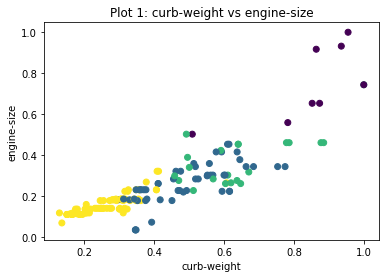

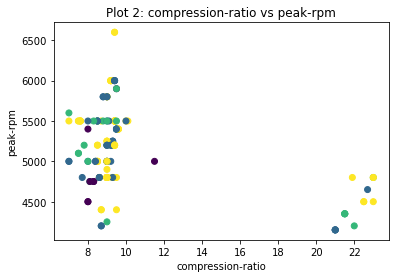

In [5]:
import matplotlib.pyplot as plt

################################################
# Your answer to Question 6 (2) STARTS HERE
################################################

header_features = list(data[0].split(','))
header_features_new = header_features[1:]

# First plot: curb-weight,engine-size

x1_index = header_features_new.index('curb-weight')
x1 = []
for i in range(len(train_features)):
    inst = train_features[i]
    x1.append(inst[x1_index])

y1 = []
y1_index = header_features_new.index('engine-size')
for i in range(len(train_features)):
    inst = train_features[i]
    y1.append(inst[y1_index])

train_labels_set = list(set(train_labels)) 
train_labels_color = []
for i in train_labels:
    color = train_labels_set.index(i)
    train_labels_color.append(color)

plt.scatter(x1, y1, c=train_labels_color)
plt.title("Plot 1: curb-weight vs engine-size")
plt.xlabel("curb-weight")
plt.ylabel("engine-size")
plt.show()


# Second plot: compression-ratio, peak-rpm

x2_index = header_features_new.index('compression-ratio')
x2 = []
for i in range(len(train_features)):
    inst = train_features[i]
    x2.append(inst[x2_index])

y2 = []
y2_index = header_features_new.index('peak-rpm')
for i in range(len(train_features)):
    inst = train_features[i]
    y2.append(inst[y2_index])

train_labels_set = list(set(train_labels)) 
train_labels_color = []
for i in train_labels:
    color = train_labels_set.index(i)
    train_labels_color.append(color)

plt.scatter(x2, y2, c=train_labels_color)
plt.title("Plot 2: compression-ratio vs peak-rpm")
plt.xlabel("compression-ratio")
plt.ylabel("peak-rpm")
plt.show()


################################################
# Your answer to Question 6 (2) ENDS HERE
################################################


<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Alejandra Victoria Abril Pareja 1199503
   
   <b>Dated</b>: 12/08/2022